## Count Vectorizer 
Four common text-to-vector transformation methods are compared for their accuracy. These are Stopwords, Simple, Lemmatization, and Stemming. The dataset used are from BBC full text documents that can be downloaded at:
__[Kaggle](https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification)__ or __[lazyprogrammer](https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv)__


In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from  nltk.corpus import wordnet

nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to C:\Users\ZAKY-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ZAKY-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ZAKY-PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
# !wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
dataset = "C:/Users/ZAKY-PC/Jupyter_proj/datasets/bbc_text_cls.csv"
df = pd.read_csv(dataset)
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


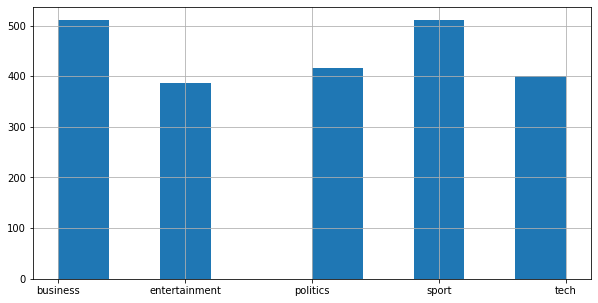

In [3]:
# assign input and label
inputs = df['text']
labels = df['labels']

# plot histogram
labels.hist(figsize=(10,5))


In [4]:
# split data into train and test dataset: to check imbalance classes
input_train, input_test, y_train, y_test = train_test_split(inputs, labels, random_state=123)
vectorizer = CountVectorizer()

x_train = vectorizer.fit_transform(input_train)
x_test = vectorizer.transform(input_test)

In [5]:
# print(x_train)
# observe the magnitude of sparse the matrix is
# print((x_train != 0).sum()) # 337411 of non  zero values

print((x_train != 0).sum()/ np.prod(x_train.shape)) # number of non-zero elements/ total number of elements

0.007695239935415004


In [6]:
# Without transformation to vector
model = MultinomialNB()
model.fit(x_train, y_train)
print("train score: ",model.score(x_train,y_train))
print("test score: ", model.score(x_test, y_test))

train score:  0.9922062350119905
test score:  0.9712746858168761


In [7]:
# Method 1: Stopwords
vectorizer_stopwords = CountVectorizer(stop_words='english')
x_train_SW = vectorizer_stopwords.fit_transform(input_train)
x_test_SW = vectorizer_stopwords.transform(input_test)

model = MultinomialNB()
model.fit(x_train_SW, y_train)

print("train score: ",model.score(x_train_SW,y_train))
print("test score: ", model.score(x_test_SW, y_test))

train score:  0.9928057553956835
test score:  0.9766606822262118


In [8]:
# Method 2: Simple tokenizer
def simple_tokenizer(s):
    return s.split() # using split function

vectorizer = CountVectorizer(tokenizer = simple_tokenizer)
x_train = vectorizer.fit_transform(input_train)
x_test = vectorizer.transform(input_test)
model = MultinomialNB()
model.fit(x_train, y_train)

print("train score: ",model.score(x_train,y_train))
print("test score: ", model.score(x_test, y_test))

train score:  0.9952038369304557
test score:  0.9712746858168761


In [9]:
# Method 3: LemmaTokenizer

# automate the pos tagging
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

    
# used to define the class for tokenizing and limiting each documents
# output is a list containing each lemmatize the word in the input document
class LemmaTokenizer:
    def __init__(self): # initializer by instantiating WordNetLemmatizer object
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc): # calling the documents to be tokenize
        tokens = word_tokenize(doc) # convert documents into token (similar to string split)
        words_and_tags = nltk.pos_tag(tokens) # to obtain the parts of speech tags
        return [self.wnl.lemmatize(word, pos= get_wordnet_pos(tag)) for word, tag in words_and_tags] # to loop every words and tag to lemmatize function
                                                                                                     

vectorizer = CountVectorizer(tokenizer = LemmaTokenizer())
x_train = vectorizer.fit_transform(input_train)
x_test = vectorizer.transform(input_test)
model = MultinomialNB()
model.fit(x_train, y_train)

print("train score: ",model.score(x_train,y_train))
print("test score: ", model.score(x_test, y_test))

train score:  0.9922062350119905
test score:  0.9676840215439856


In [10]:
# Method 4: StemTokenizer

class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer() # initiate  porterstemmer
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(t) for t in tokens]
    
vectorizer = CountVectorizer(tokenizer = StemTokenizer())
x_train = vectorizer.fit_transform(input_train)
x_test = vectorizer.transform(input_test)
model = MultinomialNB()
model.fit(x_train, y_train)

print("train score: ",model.score(x_train,y_train))
print("test score: ", model.score(x_test, y_test))

train score:  0.9892086330935251
test score:  0.9694793536804309


### Conclusion:
&nbsp;
<div style="text-align: justify">
All of the methods demonstrated similar accuracy. Stopword outperformed other methods in test score accuracy (0.98), followed by the simple split method (0.97). Both Lemmatization and Stemming methods performed poorly compared to Stopword and Simple split method. In addition, not transforming the word to vector shows better performance than both approaches. Therefore, based on these observations, we can conclude that testing all word-to-vector (Count vectorizer) transformations is required. Additionally, the Complex model (Lemmatization & Stemming) does not mean it is the best approach for a given dataset.</div>